<a href="https://colab.research.google.com/github/Taufiq-ML/Sales-Data-Analysis-Forecasting/blob/main/grocery_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel("/content/train.xlsx")

In [3]:
print(df)

      Row ID        Order ID           Order Date            Ship Date  \
0          1  CA-2017-152156  2017-08-11 00:00:00  2017-11-11 00:00:00   
1          2  CA-2017-152156  2017-08-11 00:00:00  2017-11-11 00:00:00   
2          3  CA-2017-138688  2017-12-06 00:00:00           16/06/2017   
3          4  US-2016-108966  2016-11-10 00:00:00           18/10/2016   
4          5  US-2016-108966  2016-11-10 00:00:00           18/10/2016   
...      ...             ...                  ...                  ...   
9795    9796  CA-2017-125920           21/05/2017           28/05/2017   
9796    9797  CA-2016-128608  2016-12-01 00:00:00           17/01/2016   
9797    9798  CA-2016-128608  2016-12-01 00:00:00           17/01/2016   
9798    9799  CA-2016-128608  2016-12-01 00:00:00           17/01/2016   
9799    9800  CA-2016-128608  2016-12-01 00:00:00           17/01/2016   

           Ship Mode Customer ID     Customer Name    Segment        Country  \
0       Second Class    CG-1252

##Check missing values



In [4]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9797,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9798,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Drop Postal Code Column from the Data set

In [7]:
df.drop('Postal Code',axis=1,inplace=True)

In [8]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Convert 'Order Date' to datetime format for time-series analysis

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

#Exploratory Data Analysis (EDA)

Sales Trend Over Time by Day

In [10]:
# Group data by 'Order Date' to analyze sales trends over time
sales_trend = df.groupby('Order Date')['Sales'].sum()

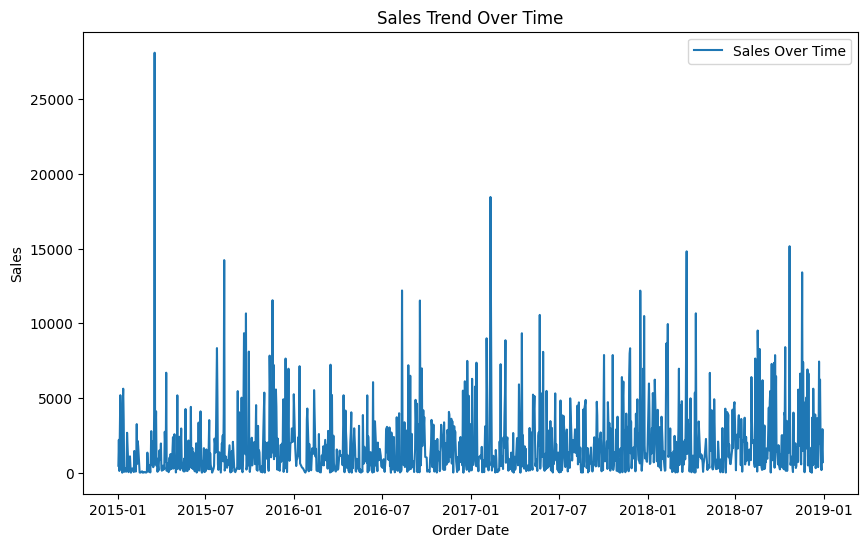

In [11]:
# Plot sales trend
plt.figure(figsize=(10,6))
plt.plot(sales_trend, label='Sales Over Time')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Key Insights:

Which months/years had the highest sales?
Which products are the best-sellers?
Which region contributed the most to sales?

#Monthly sales trend

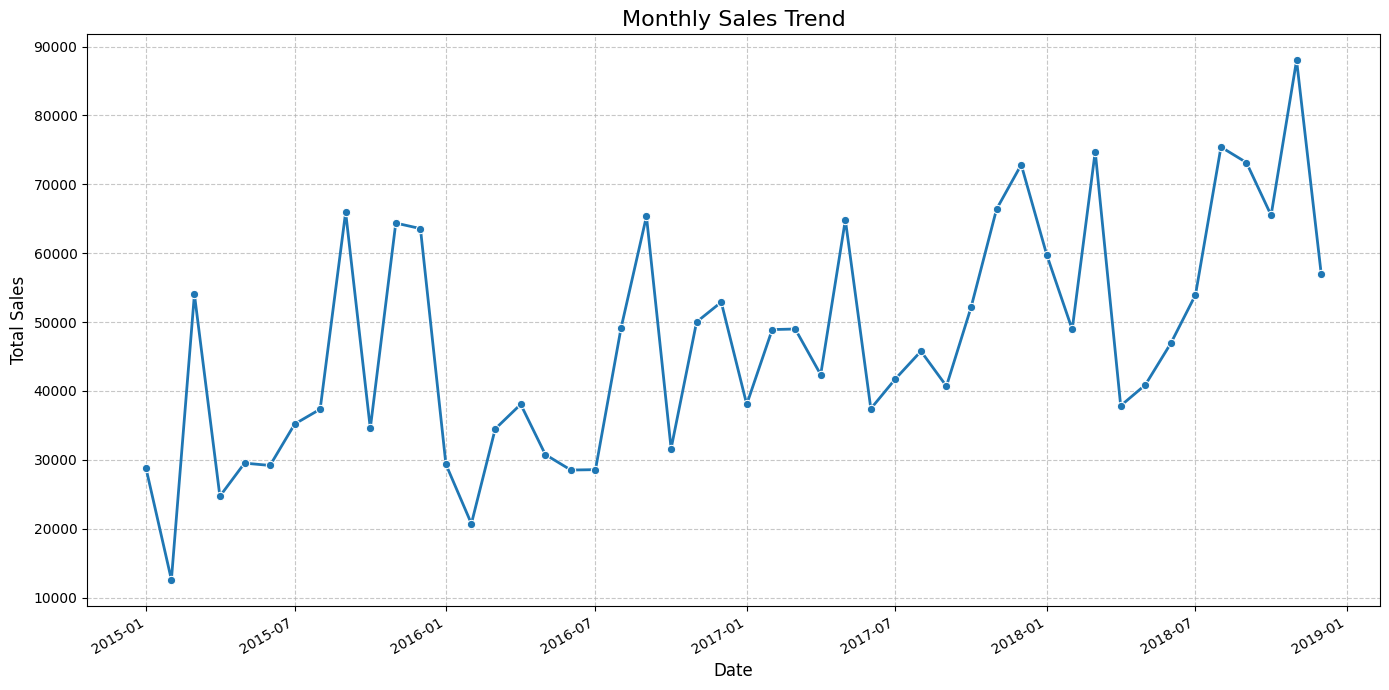

Monthly sales trend line chart created.
Total Sales: $2,261,536.78
Average Monthly Sales: $47,115.35
Highest Sales Month: November 2018 ($87,997.64)
Lowest Sales Month: February 2015 ($12,588.48)


In [12]:
 #Group by month and calculate total sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Sort the data by date
monthly_sales = monthly_sales.sort_values('Order Date')

# Create the line chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Order Date', y='Sales', linewidth=2, marker='o')

plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use a tight layout
plt.tight_layout()

# Show the plot
plt.show()

print("Monthly sales trend line chart created.")

# Calculate some basic statistics
total_sales = monthly_sales['Sales'].sum()
average_monthly_sales = monthly_sales['Sales'].mean()
max_sales_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
min_sales_month = monthly_sales.loc[monthly_sales['Sales'].idxmin()]

print(f"\
Total Sales: ${total_sales:,.2f}")
print(f"Average Monthly Sales: ${average_monthly_sales:,.2f}")
print(f"Highest Sales Month: {max_sales_month['Order Date'].strftime('%B %Y')} (${max_sales_month['Sales']:,.2f})")
print(f"Lowest Sales Month: {min_sales_month['Order Date'].strftime('%B %Y')} (${min_sales_month['Sales']:,.2f})")

In [13]:
# Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [14]:
# Bottom 10 products by sales
bottom_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(10)
print(bottom_products)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Acme Serrated Blade Letter Opener                                   7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Name: Sales, dtype: float64


#Customer Segmentation Analysis:
Analyzing customer segments (e.g., Consumer, Corporate, Home Office) to identify which segment is most profitable.

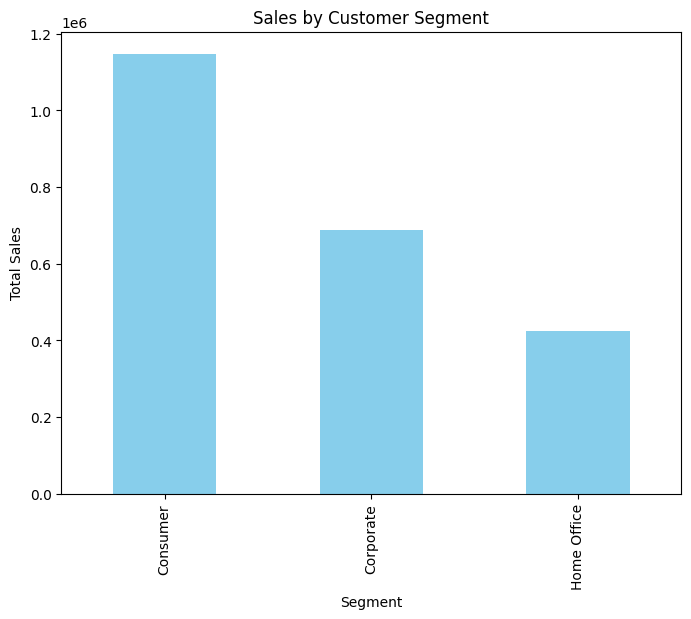

In [15]:
# Sales breakdown by customer segment
segment_sales = df.groupby('Segment')['Sales'].sum()

# Plot sales by segment
plt.figure(figsize=(8,6))
segment_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

Key Insights:

Which customer segment (e.g., Consumer, Corporate, Home Office) generates the highest sales?
Which region/state sees the most activity in each segment?

#  Region-Based Analysis:
Identifying top-performing regions and states.

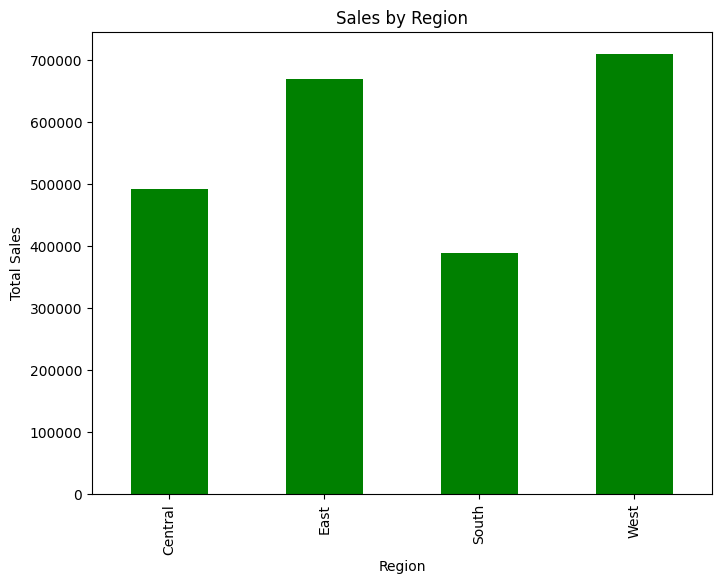

In [16]:
# Group by 'Region' to see sales by region
region_sales = df.groupby('Region')['Sales'].sum()

# Plot sales by region
plt.figure(figsize=(8,6))
region_sales.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()



Top 10 sates by sales

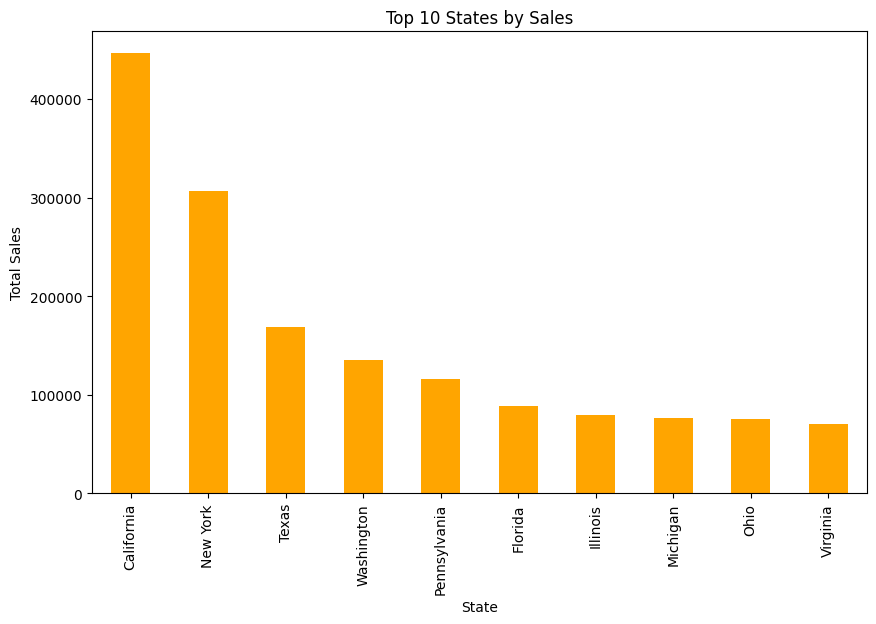

In [17]:
# State-wise sales analysis
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 states by sales
plt.figure(figsize=(10,6))
state_sales.plot(kind='bar', color='orange')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

#  Sales Forecasting Using Time-Series Analysis:
To predict future sales, I used time-series forecasting techniques like SARIMA.

Use auto_arima to Find the Best Model Parameters

In [18]:
from statsmodels.tsa.stattools import adfuller

# Select the numeric column for the ADF test (e.g., 'sales' column)
time_series_data = df['Sales']  # Replace 'sales' with the correct column name

# Perform Augmented Dickey-Fuller test
result = adfuller(time_series_data)

# Print the test statistic and p-value
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Check if the data is stationary
if result[1] > 0.05:
    print("Data is non-stationary. Differencing is required.")
else:
    print("Data is stationary. No differencing needed.")


ADF Statistic: -98.33555319790369
p-value: 0.0
Data is stationary. No differencing needed.


In [19]:
# Convert 'Order Date' to datetime if not already done
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the DataFrame index
df.set_index('Order Date', inplace=True)

# Resample the data monthly and sum the 'Sales' column
df_monthly = df['Sales'].resample('M').sum()

print(df_monthly.head())


Order Date
2015-01-31    28828.254
2015-02-28    12588.484
2015-03-31    54027.692
2015-04-30    24710.016
2015-05-31    29520.490
Freq: ME, Name: Sales, dtype: float64


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -385.419
Date:                            Sat, 19 Oct 2024   AIC                            780.837
Time:                                    11:51:20   BIC                            788.614
Sample:                                01-31-2015   HQIC                           783.522
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2979      0.496      0.601      0.548      -0.674       1.270
ma.L1         -0.7920      0.397   

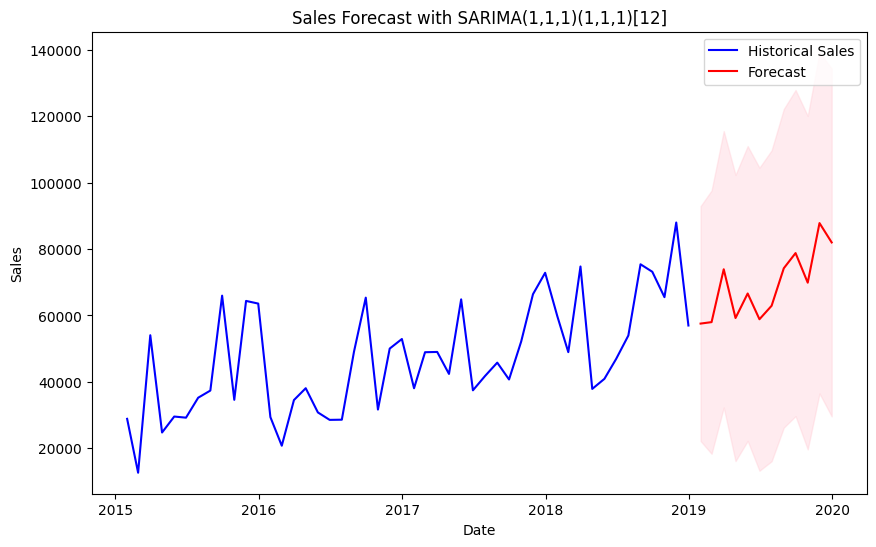

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a manual SARIMA model with the monthly data
model_manual = SARIMAX(df_monthly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_manual = model_manual.fit()

# Print the model summary
print(results_manual.summary())

# Forecast the next 12 months
forecast_manual = results_manual.get_forecast(steps=12)
forecast_values = forecast_manual.predicted_mean
conf_int = forecast_manual.conf_int()

# Plot the historical and forecast data
plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Historical Sales', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.title('Sales Forecast with SARIMA(1,1,1)(1,1,1)[12]')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 10454.65
Mean Squared Error (MSE): 190920543.85
Root Mean Squared Error (RMSE): 13817.40
Mean Absolute Percentage Error (MAPE): 21.06%


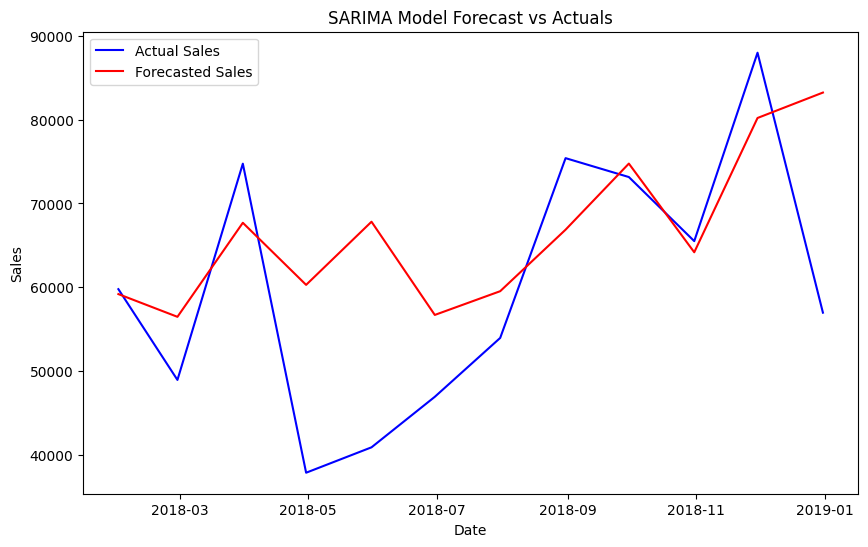

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data: train set (all but the last 12 months) and test set (last 12 months)
train = df_monthly.iloc[:-12]
test = df_monthly.iloc[-12:]

# Train the SARIMA model on the training data
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for the next 12 months (same length as the test set)
forecast = results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecast_values)
mse = mean_squared_error(test, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast_values) / test)) * 100

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot the forecast vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual Sales', color='blue')
plt.plot(forecast_values, label='Forecasted Sales', color='red')
plt.title('SARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
